# DPSI case study

### Notebook helper function for pretty output

In [1]:
import re

from IPython.display import Markdown
from IPython.display import display
from ipywidgets import interact
from tabulate import tabulate

md_heading_pattern = re.compile(r"([#]+)")


def print_md(markdown_printable, model=False):
    """Pretty render Markdown."""
    if model:
        markdown_printable = md_heading_pattern.sub(r"\1##", markdown_printable)
    display(Markdown(str(markdown_printable)))


def print_yaml_file(file_path):
    """Pretty render yaml file."""
    with open(file_path) as f:
        print_md(f"```yaml\n{f.read()}\n```")

### Plotting functions ([`pyglotaran_extras`](https://github.com/s-weigand/pyglotaran-extras/commit/20da3593105fb839f86e668dc12dc9ca87c3b9ce) + `matplotlib`)

In [2]:
import matplotlib.pyplot as plt
from pyglotaran_extras.plotting.plot_overview import plot_overview
from pyglotaran_extras.plotting.plot_svd import plot_svd
from pyglotaran_extras.plotting.style import PlotStyle

plot_style = PlotStyle()
plt.rc("axes", prop_cycle=plot_style.cycler)
plt.rcParams["figure.figsize"] = (21, 14)

### Analysis functions

In [3]:
from glotaran.analysis.optimize import optimize
from glotaran.io import load_dataset
from glotaran.io import load_model
from glotaran.io import load_parameters
from glotaran.project.scheme import Scheme

### Read data

In [4]:
dataset1 = load_dataset("data/RT400_590excDPSIjul30tr24KtargetPB10a.ascii")
dataset2 = load_dataset("data/RT400_590excDPSIjul30tr24KtargetPB10b.ascii")
dataset3 = load_dataset("data/RT400_590excDPSIjul30tr24KtargetPB10c.ascii")
dataset4 = load_dataset("data/RT400_590excDPSIjul30tr24KtargetPB10d.ascii")
dataset5 = load_dataset("data/RT400_590excDPSIjul30tr24KtargetPB10e.ascii")
dataset6 = load_dataset("data/RT400_590excDPSIjul30tr24KtargetPB10f.ascii")

four_datasets = {
    "dataset1": dataset1,
    "dataset2": dataset2,
    "dataset3": dataset3,
    "dataset4": dataset4,
}
six_datasets = {**four_datasets, "dataset5": dataset5, "dataset6": dataset6}


def plot_datasets(dataset_name):
    """Plot helper function to use with widgets"""
    dataset = six_datasets[dataset_name]
    if len(dataset.data.time) > 1:
        dataset.data.plot(x="time", center=False)
    else:
        dataset.data.plot()


interact(plot_datasets, dataset_name=six_datasets.keys())

interactive(children=(Dropdown(description='dataset_name', options=('dataset1', 'dataset2', 'dataset3', 'datas…

<function __main__.plot_datasets(dataset_name)>

## Sequential Model

### Load model and parameters

In [5]:
sequential_model = load_model("models/model_DPSI_sequential_irf.yml")
sequential_parameters = load_parameters("models/parameters_DPSI_sequential_irf.yml")
print_md(sequential_model.validate(parameters=sequential_parameters))

Your model is valid.

In [21]:
print_md(sequential_model.markdown(), model=True)

### Model

_Type_: kinetic-spectrum

#### Initial Concentration

* **input400**:
  * *Label*: input400
  * *Compartments*: ['s1', 's2', 's3', 's4']
  * *Parameters*: [inputs.one, inputs.zero, inputs.zero, inputs.zero]
  * *Exclude From Normalize*: []
* **input590**:
  * *Label*: input590
  * *Compartments*: ['t1', 't2', 't3', 't4']
  * *Parameters*: [inputs.one, inputs.zero, inputs.zero, inputs.zero]
  * *Exclude From Normalize*: []

#### K Matrix

* **km1**:
  * *Label*: km1
  * *Matrix*: 
    * *('s2', 's1')*: rates.k1
    * *('s3', 's2')*: rates.k2
    * *('s4', 's3')*: rates.k3
    * *('s4', 's4')*: rates.k4
  
* **km2**:
  * *Label*: km2
  * *Matrix*: 
    * *('t2', 't1')*: rates2.k1
    * *('t3', 't2')*: rates2.k2
    * *('t4', 't3')*: rates2.k3
    * *('t4', 't4')*: rates2.k4
  

#### Irf

* **irf1** (spectral-multi-gaussian):
  * *Label*: irf1
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf.center1]
  * *Width*: [irf.width1, irf.width2]
  * *Scale*: [irf.scale1, irf.scale2]
  * *Normalize*: True
  * *Backsweep*: True
  * *Backsweep Period*: irf.common_backsweep
  * *Dispersion Center*: irf.common_dispcenter
  * *Center Dispersion*: [irf.data1_disp1, irf.data1_disp2]
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False
* **irf2** (spectral-multi-gaussian):
  * *Label*: irf2
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf.center2]
  * *Width*: [irf.width3, irf.width4]
  * *Scale*: [irf.scale1, irf.scale3]
  * *Normalize*: True
  * *Backsweep*: True
  * *Backsweep Period*: irf.common_backsweep
  * *Dispersion Center*: irf.common_dispcenter
  * *Center Dispersion*: [irf.data1_disp1, irf.data1_disp2]
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False
* **irf3** (spectral-multi-gaussian):
  * *Label*: irf3
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf.center3]
  * *Width*: [irf.width5, irf.width6]
  * *Scale*: [irf.scale1, irf.scale4]
  * *Normalize*: True
  * *Backsweep*: True
  * *Backsweep Period*: irf.common_backsweep
  * *Dispersion Center*: irf.common_dispcenter
  * *Center Dispersion*: [irf.data1_disp3, irf.data1_disp4]
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False
* **irf4** (spectral-multi-gaussian):
  * *Label*: irf4
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf.center4]
  * *Width*: [irf.width7, irf.width8]
  * *Scale*: [irf.scale1, irf.scale5]
  * *Normalize*: True
  * *Backsweep*: True
  * *Backsweep Period*: irf.common_backsweep
  * *Dispersion Center*: irf.common_dispcenter
  * *Center Dispersion*: [irf.data1_disp3, irf.data1_disp4]
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False

#### Dataset

* **dataset1**:
  * *Label*: dataset1
  * *Megacomplex*: ['complex1']
  * *Scale*: scale.1
  * *Initial Concentration*: input400
  * *Irf*: irf1
* **dataset2**:
  * *Label*: dataset2
  * *Megacomplex*: ['complex1']
  * *Scale*: scale.2
  * *Initial Concentration*: input400
  * *Irf*: irf2
* **dataset3**:
  * *Label*: dataset3
  * *Megacomplex*: ['complex2']
  * *Scale*: scale.3
  * *Initial Concentration*: input590
  * *Irf*: irf3
* **dataset4**:
  * *Label*: dataset4
  * *Megacomplex*: ['complex2']
  * *Scale*: scale.4
  * *Initial Concentration*: input590
  * *Irf*: irf4

#### Megacomplex

* **complex1** (None):
  * *Label*: complex1
  * *K Matrix*: ['km1']
* **complex2** (None):
  * *Label*: complex2
  * *K Matrix*: ['km2']



### Create scheme and optimize it

In [7]:
sequential_scheme = Scheme(
    sequential_model,
    sequential_parameters,
    data=four_datasets,
    group_tolerance=1.9,
    non_negative_least_squares=True,
    maximum_number_function_evaluations=11,
)
sequential_result = optimize(sequential_scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.9238e+07                                    3.53e+10    
       1              2         1.2521e+07      3.67e+07       3.61e-01       7.57e+08    
       2              3         1.0133e+07      2.39e+06       3.35e-02       4.26e+07    
       3              4         1.0123e+07      9.51e+03       2.29e-03       6.20e+07    
       4              5         1.0120e+07      3.07e+03       1.24e-03       3.10e+07    
       5              6         1.0119e+07      9.94e+02       7.57e-04       1.62e+07    
       6              7         1.0119e+07      3.21e+02       4.98e-04       8.80e+06    
       7              8         1.0119e+07      1.04e+02       3.57e-04       4.88e+06    
       8              9         1.0119e+07      3.40e+01       2.76e-04       2.73e+06    
       9             10         1.0119e+07      1.14e+01       2.26e-04       1.54e+06    

In [8]:
root_mean_square_errors = []
for dataset_name in four_datasets.keys():
    root_mean_square_errors.append(
        (dataset_name, sequential_result.data[dataset_name].root_mean_square_error)
    )
print_md(tabulate(root_mean_square_errors, headers=("dataset", "RMS-Error"), tablefmt="github"))

| dataset   |   RMS-Error |
|-----------|-------------|
| dataset1  |     4.89085 |
| dataset2  |     2.98439 |
| dataset3  |    12.7078  |
| dataset4  |     8.33412 |

### Result plots

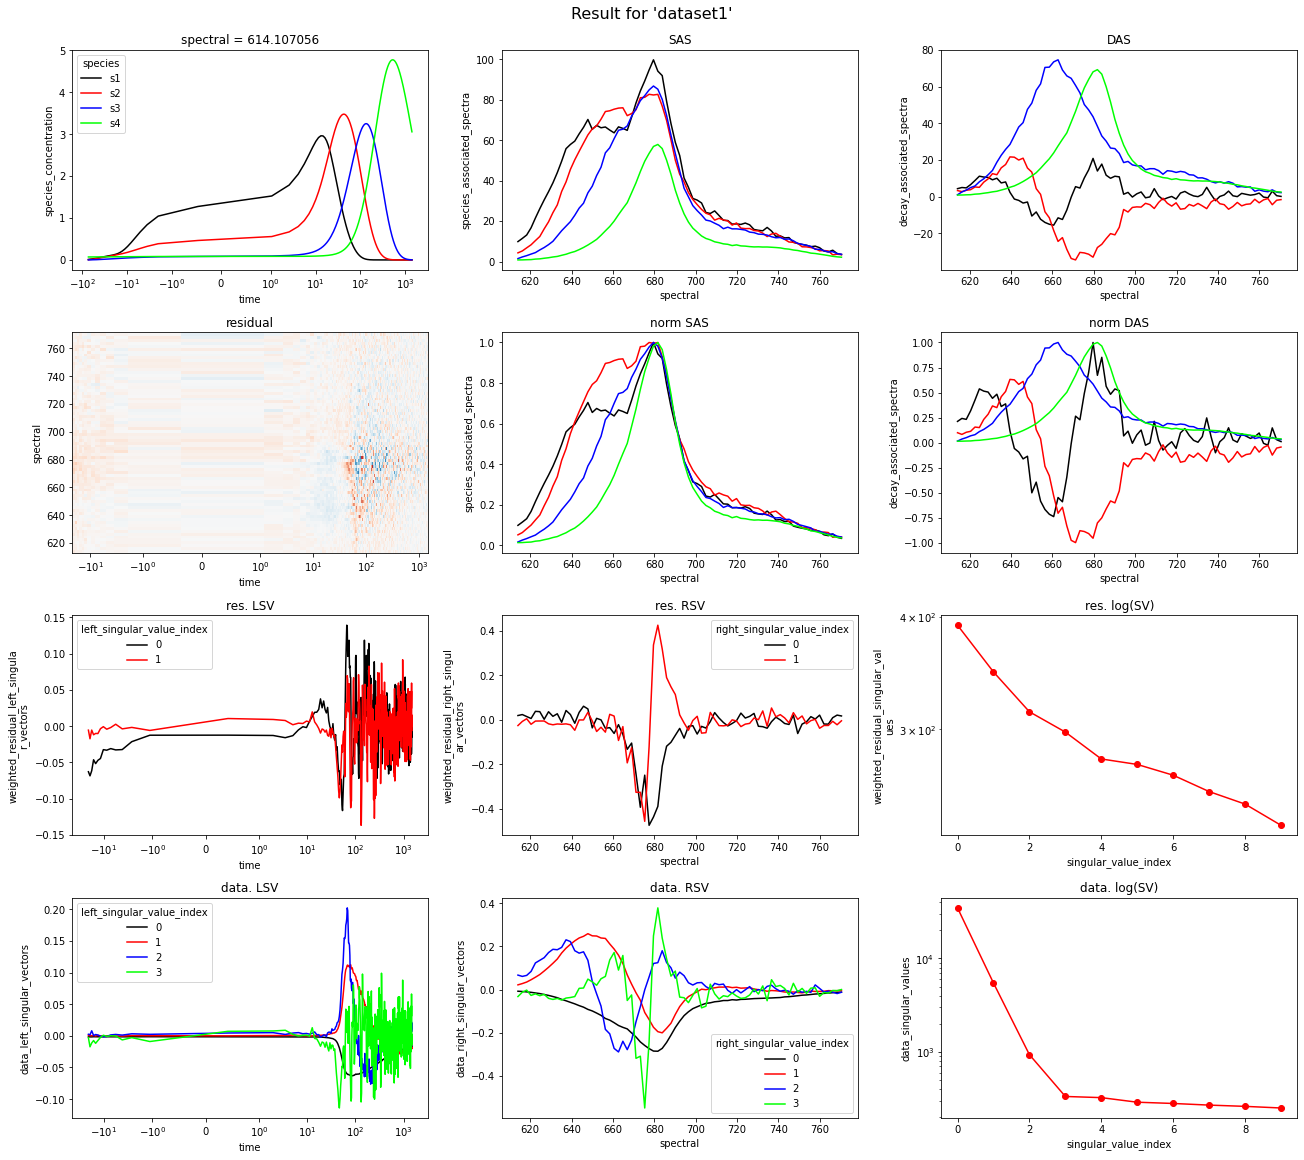

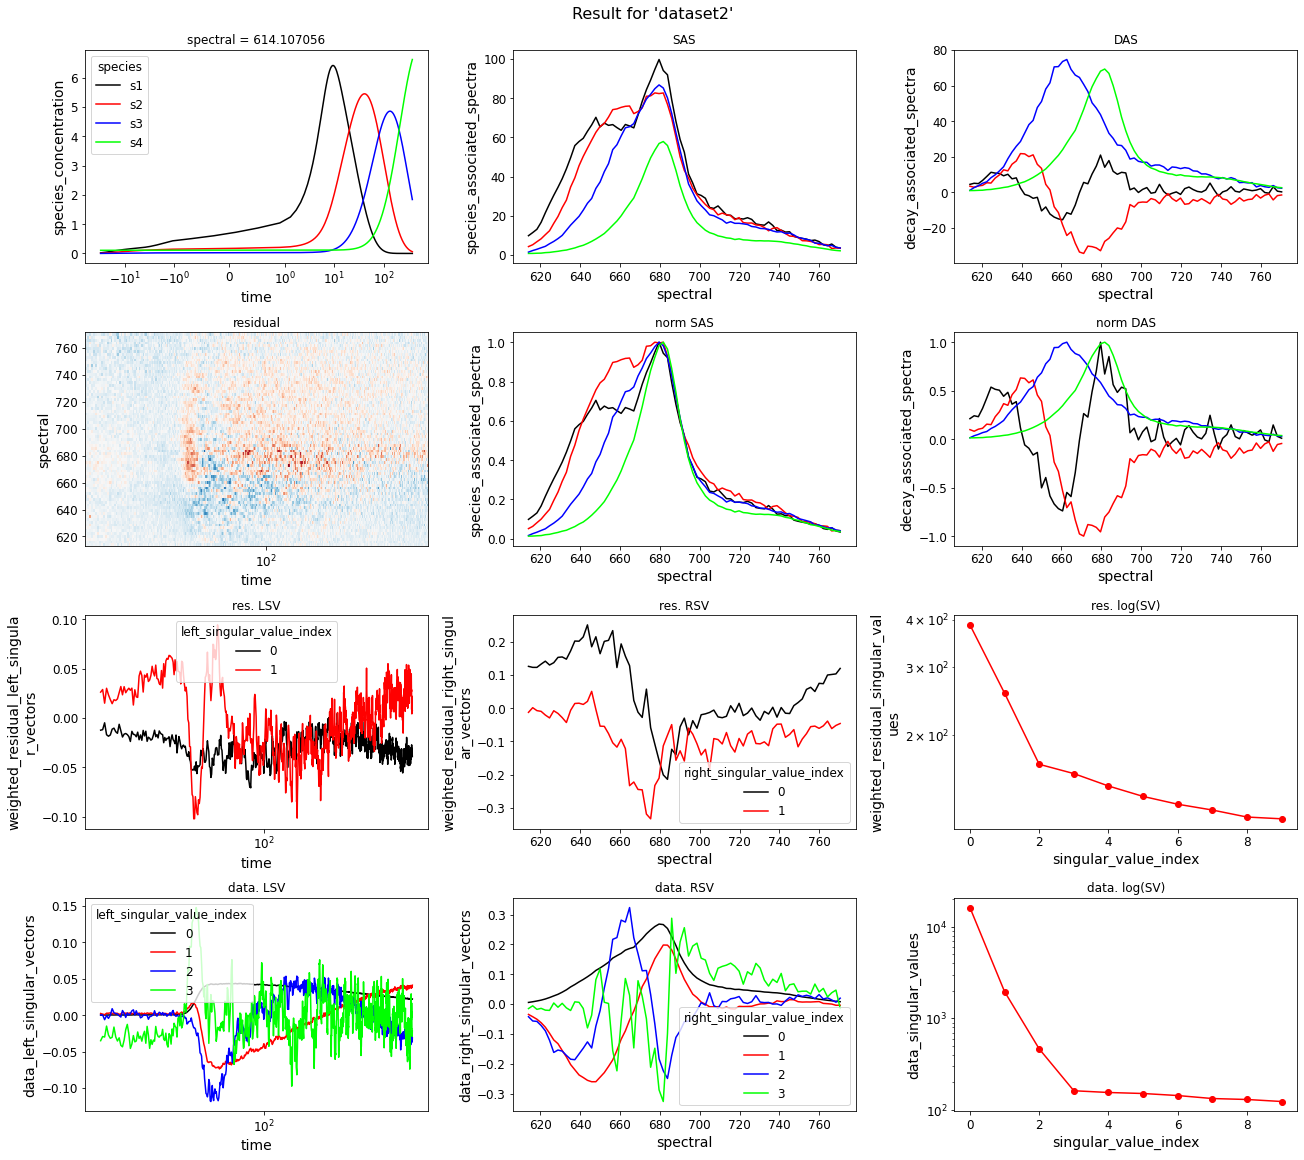

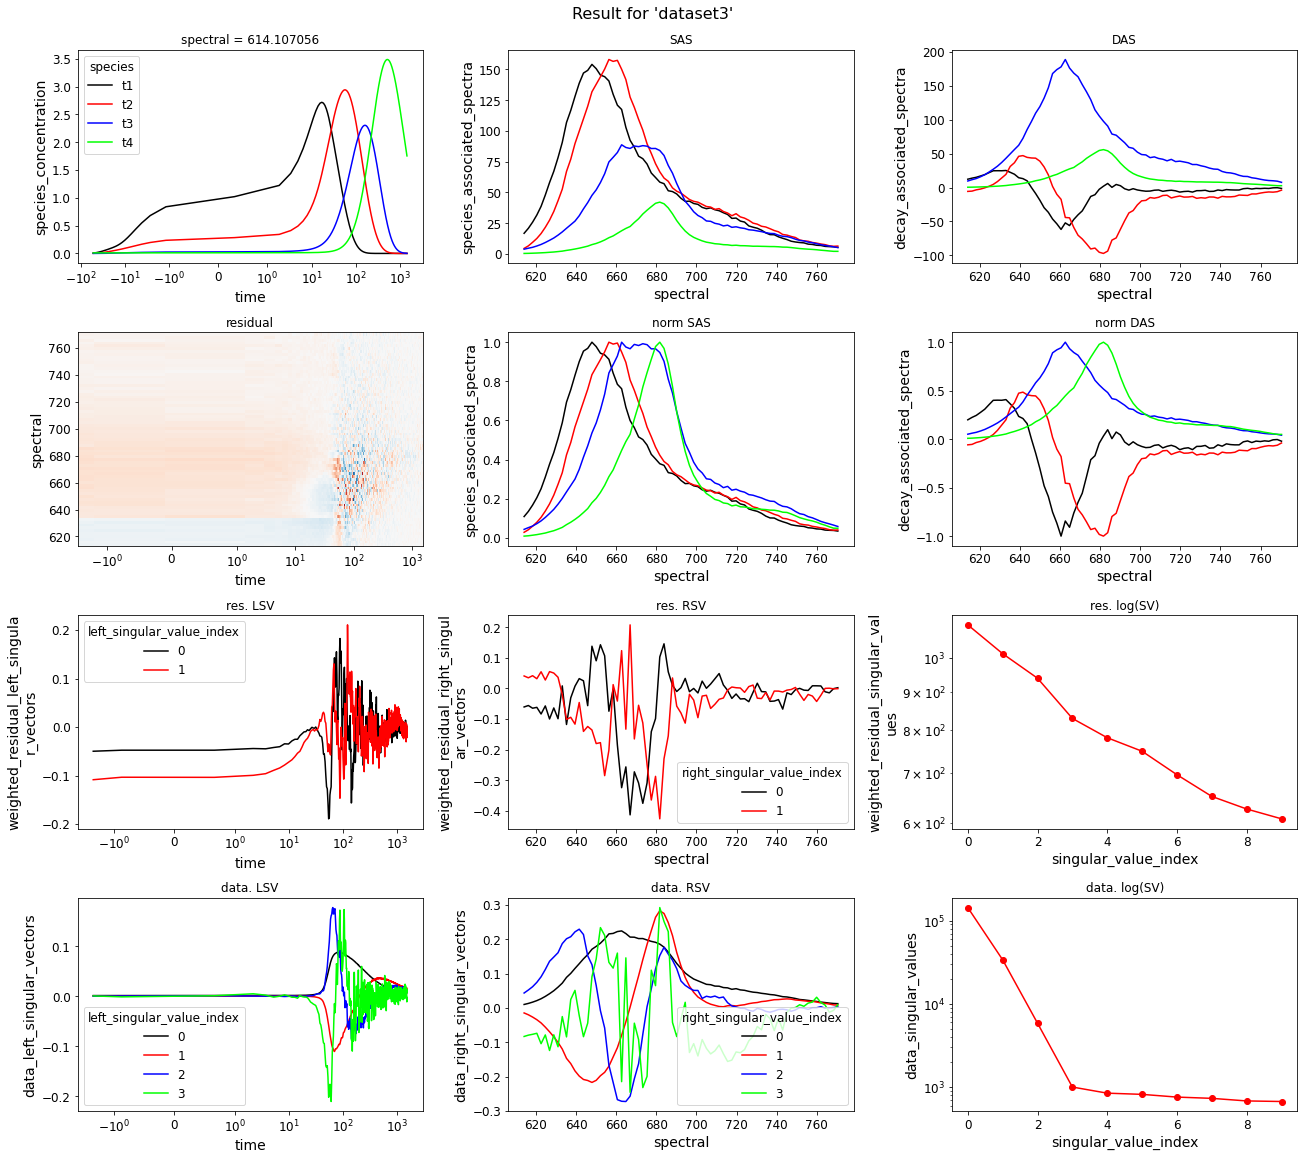

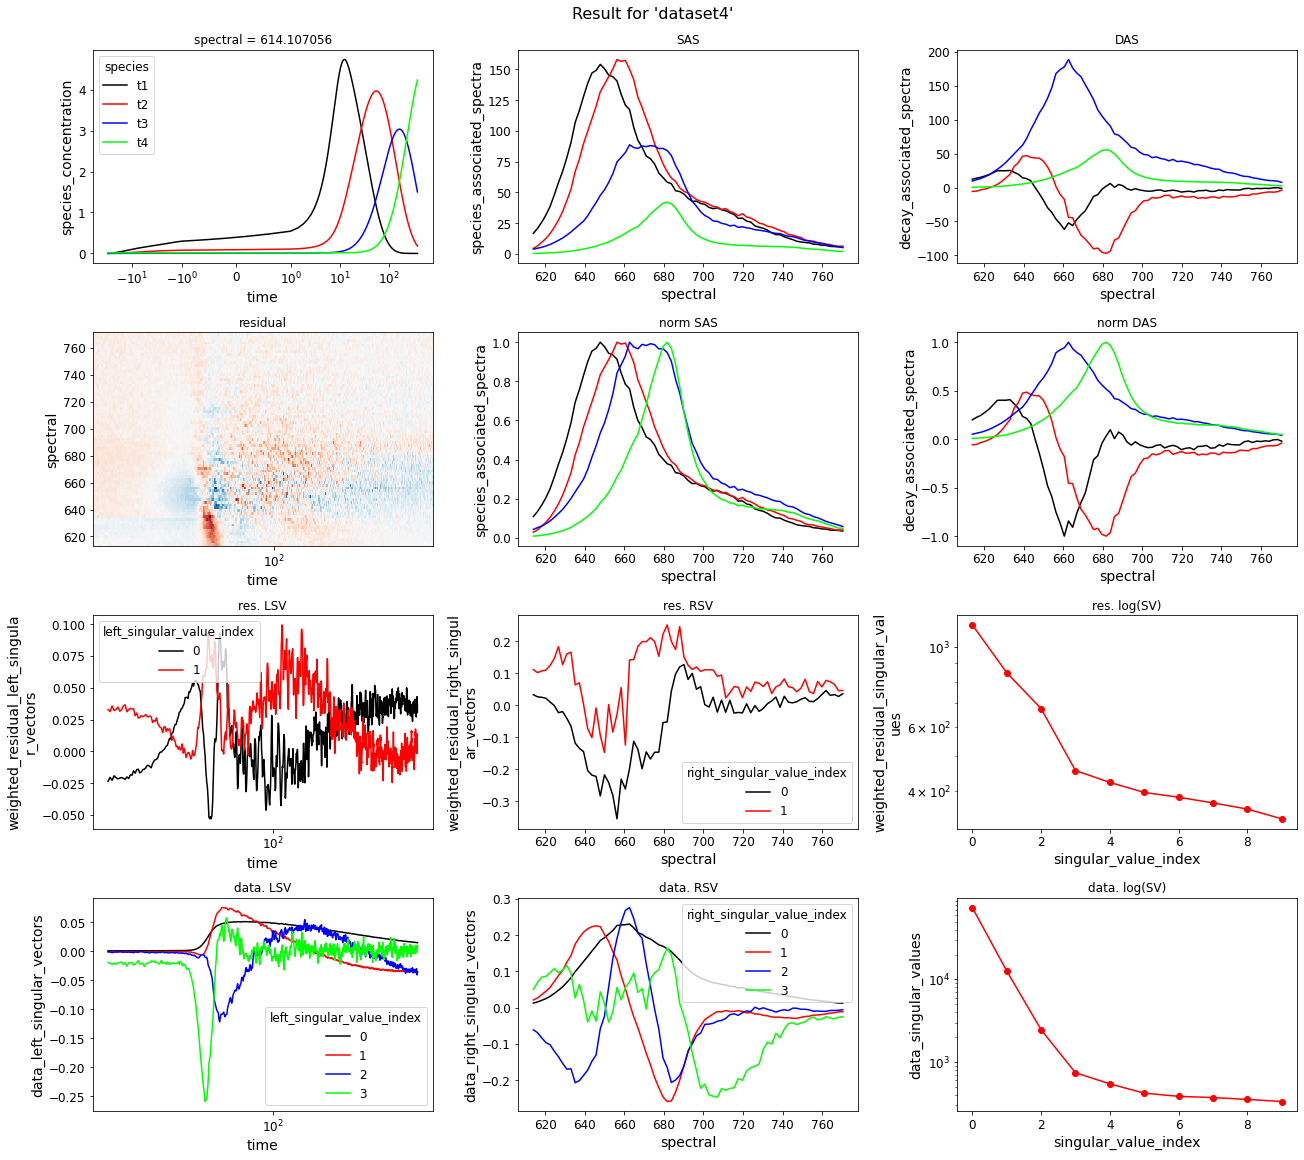

In [9]:
for dataset_name in four_datasets.keys():
    fig = plot_overview(sequential_result.data[dataset_name], linthresh=150)
    fig.suptitle(f"Result for {dataset_name!r}", fontsize=16)

In [10]:
print_md(sequential_result.optimized_parameters)

  * __inputs__:

    | _Label_   |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    | zero      |         0 |          0 |    -inf |     inf | False    | False            | None     |
    | one       |         1 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf__:

    | _Label_           |      _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-------------------|--------------|-------------|---------|---------|----------|------------------|----------|
    | center1           |    51.2006   | 0           |    -inf |     inf | False    | False            | None     |
    | center2           |    50.7999   | 0           |    -inf |     inf | False    | False            | None     |
    | center3           |    50.8097   | 0           |    -inf |     inf | False    | False            | None     |
    | center4           |    50.6241   | 0           |    -inf |     inf | False    | False            | None     |
    | width1            |     8.1106   | 0           |    -inf |     inf | False    | False            | None     |
    | width2            |    37.0027   | 0           |    -inf |     inf | False    | False            | None     |
    | width3            |     2.9626   | 0           |    -inf |     inf | False    | False            | None     |
    | width4            |    18.3664   | 0           |    -inf |     inf | False    | False            | None     |
    | width5            |     8.2726   | 0           |    -inf |     inf | False    | False            | None     |
    | width6            |    25.1026   | 0           |    -inf |     inf | False    | False            | None     |
    | width7            |     3.38693  | 0           |    -inf |     inf | False    | False            | None     |
    | width8            |    14.6401   | 0           |    -inf |     inf | False    | False            | None     |
    | scale1            |     1        | 0           |    -inf |     inf | False    | False            | None     |
    | scale2            |     0.190623 | 0.000391255 |    -inf |     inf | True     | False            | None     |
    | scale3            |     0.121257 | 0.000691829 |    -inf |     inf | True     | False            | None     |
    | scale4            |     0.246521 | 0.000105201 |    -inf |     inf | True     | False            | None     |
    | scale5            |     0.177543 | 0.000175361 |    -inf |     inf | True     | False            | None     |
    | common_dispcenter |   700        | 0           |    -inf |     inf | False    | False            | None     |
    | data1_disp1       |    -1.64111  | 0           |    -inf |     inf | False    | False            | None     |
    | data1_disp2       |     4.38865  | 0           |    -inf |     inf | False    | False            | None     |
    | data1_disp3       |    -2.19848  | 0           |    -inf |     inf | False    | False            | None     |
    | data1_disp4       |     6.1781   | 0           |    -inf |     inf | False    | False            | None     |
    | common_backsweep  | 13800        | 0           |    -inf |     inf | False    | False            | None     |

  * __rates__:

    | _Label_   |     _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-------------|-------------|---------|---------|----------|------------------|----------|
    | k1        | 0.0494367   | 0.000268494 |    -inf |     inf | True     | False            | None     |
    | k2        | 0.0145881   | 4.61099e-05 |    -inf |     inf | True     | False            | None     |
    | k3        | 0.00596503  | 5.43854e-06 |    -inf |     inf | True     | False            | None     |
    | k4        | 0.000670587 | 2.49008e-07 |    -inf |     inf | True     | False            | None     |

  * __rates2__:

    | _Label_   |    _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|------------|-------------|---------|---------|----------|------------------|----------|
    | k1        | 0.0370134  | 2.25217e-05 |    -inf |     inf | True     | False            | None     |
    | k2        | 0.0107148  | 5.53197e-06 |    -inf |     inf | True     | False            | None     |
    | k3        | 0.00617795 | 1.35019e-06 |    -inf |     inf | True     | False            | None     |
    | k4        | 0.00094287 | 1.52547e-07 |    -inf |     inf | True     | False            | None     |

  * __rel__:

    | _Label_   |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    | r1        |         1 |          0 |    -inf |     inf | False    | False            | None     |

  * __scale__:

    |   _Label_ |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|-------------|---------|---------|----------|------------------|----------|
    |         1 |  1        | 0           |    -inf |     inf | False    | False            | None     |
    |         2 |  0.206056 | 0.00105132  |    -inf |     inf | True     | False            | None     |
    |         3 |  4.5534   | 0           |    -inf |     inf | False    | False            | None     |
    |         4 |  0.98348  | 0.000845087 |    -inf |     inf | True     | False            | None     |

  * __scalem__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |         1 |          0 |    -inf |     inf | False    | False            | None     |



## Guidance Model

### Load model and parameters

In [11]:
guidance_model = load_model("models/model_DPSI_guidance_no_area_irf.yml")
guidance_parameters = load_parameters("models/parameters_DPSI_guidance_no_area_irf.yml")
print_md(guidance_model.validate(parameters=guidance_parameters))

Your model is valid.

In [12]:
print_md(guidance_model.markdown(), model=True)

### Model

_Type_: kinetic-spectrum

#### Initial Concentration

* **input400**:
  * *Label*: input400
  * *Compartments*: ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's15', 's16']
  * *Parameters*: [inputs400.APC660, inputs400.APC660, inputs400.APC660a, inputs400.APC680, inputs400.PC650, inputs400.PC650, inputs400.PC650, inputs400.PC640, inputs400.PC640, inputs400.PC640, inputs400.PS2, inputs.zero, inputs.zero, inputs.zero]
  * *Exclude From Normalize*: []
* **input590**:
  * *Label*: input590
  * *Compartments*: ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's13', 's14', 's15', 's16']
  * *Parameters*: [inputs590.APC660, inputs590.APC660, inputs590.APC660a, inputs590.APC680, inputs590.PC650, inputs590.PC650, inputs590.PC650, inputs590.PC640, inputs590.PC640, inputs590.PC640, inputs590.PS2, inputs.zero, inputs.zero, inputs.zero]
  * *Exclude From Normalize*: []
* **input5**:
  * *Label*: input5
  * *Compartments*: ['s1']
  * *Parameters*: [inputs.one]
  * *Exclude From Normalize*: []
* **input6**:
  * *Label*: input6
  * *Compartments*: ['s4']
  * *Parameters*: [inputs.one]
  * *Exclude From Normalize*: []

#### K Matrix

* **km1common**:
  * *Label*: km1common
  * *Matrix*: 
    * *('s1', 's2')*: rates.k1
    * *('s2', 's1')*: rates.k1
    * *('s3', 's1')*: rates.k26
    * *('s1', 's3')*: rates.k1
    * *('s3', 's2')*: rates.k3
    * *('s2', 's3')*: rates.k4
    * *('s3', 's4')*: rates.k6
    * *('s4', 's3')*: rates.k5
    * *('s5', 's1')*: rates.k8
    * *('s1', 's5')*: rates.k7
    * *('s6', 's2')*: rates.k8
    * *('s2', 's6')*: rates.k7
    * *('s7', 's3')*: rates.k8
    * *('s3', 's7')*: rates.k9
    * *('s5', 's8')*: rates.k24
    * *('s8', 's5')*: rates.k25
    * *('s6', 's9')*: rates.k24
    * *('s9', 's6')*: rates.k25
    * *('s7', 's10')*: rates.k24
    * *('s10', 's7')*: rates.k25
  
* **km1out**:
  * *Label*: km1out
  * *Matrix*: 
    * *('s15', 's1')*: rates.k2
    * *('s15', 's2')*: rates.k2
    * *('s15', 's3')*: rates.k2
    * *('s15', 's4')*: rates.k2
    * *('s15', 's5')*: rates.k2
    * *('s15', 's6')*: rates.k2
    * *('s15', 's7')*: rates.k2
    * *('s15', 's8')*: rates.k2
    * *('s15', 's9')*: rates.k2
    * *('s15', 's10')*: rates.k2
    * *('s15', 's15')*: rates.k48
  
* **km1ps2open**:
  * *Label*: km1ps2open
  * *Matrix*: 
    * *('s11', 's4')*: rates.k56
    * *('s4', 's11')*: rates.k57
    * *('s11', 's11')*: rates.k52
    * *('s11', 's12')*: rates.k53
    * *('s12', 's11')*: rates.k54
    * *('s12', 's12')*: rates.k55
  
* **km1ps2closed**:
  * *Label*: km1ps2closed
  * *Matrix*: 
    * *('s11', 's4')*: rates.k56
    * *('s4', 's11')*: rates.k57
    * *('s11', 's11')*: rates.k52
    * *('s11', 's12')*: rates.k43
    * *('s12', 's11')*: rates.k44
    * *('s12', 's12')*: rates.k45
  
* **km1ps2open2**:
  * *Label*: km1ps2open2
  * *Matrix*: 
    * *('s13', 's4')*: rates.k56
    * *('s4', 's13')*: rates.k57
    * *('s13', 's13')*: rates.k52
    * *('s13', 's14')*: rates.k53
    * *('s14', 's13')*: rates.k54
    * *('s14', 's14')*: rates.k55
  
* **km1ps2closed2**:
  * *Label*: km1ps2closed2
  * *Matrix*: 
    * *('s13', 's4')*: rates.k56
    * *('s4', 's13')*: rates.k57
    * *('s13', 's13')*: rates.k52
    * *('s13', 's14')*: rates.k43
    * *('s14', 's13')*: rates.k44
    * *('s14', 's14')*: rates.k45
  
* **km5out**:
  * *Label*: km5out
  * *Matrix*: 
    * *('s16', 's1')*: rates.k40
    * *('s16', 's2')*: rates.k40
    * *('s16', 's3')*: rates.k40
    * *('s16', 's4')*: rates.k40
    * *('s16', 's5')*: rates.k40
    * *('s16', 's6')*: rates.k40
    * *('s16', 's7')*: rates.k40
    * *('s16', 's8')*: rates.k40
    * *('s16', 's9')*: rates.k40
    * *('s16', 's10')*: rates.k40
    * *('s16', 's16')*: rates.k48
  
* **km6**:
  * *Label*: km6
  * *Matrix*: 
    * *('s1', 's1')*: rates.k40
  
* **km7**:
  * *Label*: km7
  * *Matrix*: 
    * *('s4', 's4')*: rates.k40
  

#### Irf

* **irf1** (spectral-multi-gaussian):
  * *Label*: irf1
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf.center1]
  * *Width*: [irf.width1_1, irf.width1_2]
  * *Scale*: [irf.scale_full, irf.scale1]
  * *Normalize*: True
  * *Backsweep*: False
  * *Dispersion Center*: irf.common_dispcenter
  * *Center Dispersion*: [irf.data1_disp1, irf.data1_disp2]
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False
* **irf2** (spectral-multi-gaussian):
  * *Label*: irf2
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf.center2]
  * *Width*: [irf.width2_1, irf.width2_2]
  * *Scale*: [irf.scale_full, irf.scale2]
  * *Normalize*: True
  * *Backsweep*: False
  * *Dispersion Center*: irf.common_dispcenter
  * *Center Dispersion*: [irf.data1_disp1, irf.data1_disp2]
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False
* **irf3** (spectral-multi-gaussian):
  * *Label*: irf3
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf.center3]
  * *Width*: [irf.width3_1, irf.width3_2]
  * *Scale*: [irf.scale_full, irf.scale3]
  * *Normalize*: True
  * *Backsweep*: False
  * *Dispersion Center*: irf.common_dispcenter
  * *Center Dispersion*: [irf.data1_disp3, irf.data1_disp4]
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False
* **irf4** (spectral-multi-gaussian):
  * *Label*: irf4
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf.center4]
  * *Width*: [irf.width4_1, irf.width4_2]
  * *Scale*: [irf.scale_full, irf.scale4]
  * *Normalize*: True
  * *Backsweep*: False
  * *Dispersion Center*: irf.common_dispcenter
  * *Center Dispersion*: [irf.data1_disp3, irf.data1_disp4]
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False

#### Dataset

* **dataset1**:
  * *Label*: dataset1
  * *Megacomplex*: ['open1', 'closed1', 'common_out']
  * *Megacomplex Scale*: [scalem.open1, scalem.closed1_ds1, scalem.common_out_ds1]
  * *Scale*: scale.1
  * *Initial Concentration*: input400
  * *Irf*: irf1
* **dataset2**:
  * *Label*: dataset2
  * *Megacomplex*: ['open1', 'closed1', 'common_out']
  * *Megacomplex Scale*: [scalem.open1, scalem.closed1_ds2, scalem.common_out_ds2]
  * *Scale*: scale.2
  * *Initial Concentration*: input400
  * *Irf*: irf2
* **dataset3**:
  * *Label*: dataset3
  * *Megacomplex*: ['open2', 'closed2', 'common_out']
  * *Megacomplex Scale*: [scalem.open2, scalem.closed2_ds3, scalem.common_out_ds3]
  * *Scale*: scale.3
  * *Initial Concentration*: input590
  * *Irf*: irf3
* **dataset4**:
  * *Label*: dataset4
  * *Megacomplex*: ['open2', 'closed2', 'common_out']
  * *Megacomplex Scale*: [scalem.open2, scalem.closed2_ds4, scalem.common_out_ds4]
  * *Scale*: scale.4
  * *Initial Concentration*: input590
  * *Irf*: irf4
* **dataset5**:
  * *Label*: dataset5
  * *Megacomplex*: ['complex6']
  * *Scale*: scale.5
  * *Initial Concentration*: input5
* **dataset6**:
  * *Label*: dataset6
  * *Megacomplex*: ['complex7']
  * *Scale*: scale.5
  * *Initial Concentration*: input6

#### Megacomplex

* **open1** (None):
  * *Label*: open1
  * *K Matrix*: ['km1common', 'km1out', 'km1ps2open']
* **closed1** (None):
  * *Label*: closed1
  * *K Matrix*: ['km1common', 'km1out', 'km1ps2closed']
* **open2** (None):
  * *Label*: open2
  * *K Matrix*: ['km1common', 'km1out', 'km1ps2open2']
* **closed2** (None):
  * *Label*: closed2
  * *K Matrix*: ['km1common', 'km1out', 'km1ps2closed2']
* **common_out** (None):
  * *Label*: common_out
  * *K Matrix*: ['km1common', 'km5out']
* **complex6** (None):
  * *Label*: complex6
  * *K Matrix*: ['km6']
* **complex7** (None):
  * *Label*: complex7
  * *K Matrix*: ['km7']

#### Spectral Constraints

* **zero**:
  * *Type*: zero
  * *Compartment*: s12
  * *Interval*: [[1, 1000]]
* **zero**:
  * *Type*: zero
  * *Compartment*: s14
  * *Interval*: [[1, 1000]]
* **zero**:
  * *Type*: zero
  * *Compartment*: s15
  * *Interval*: [[1, 1000]]
* **zero**:
  * *Type*: zero
  * *Compartment*: s16
  * *Interval*: [[1, 1000]]

#### Spectral Relations

* 
  * *Compartment*: s1
  * *Target*: s2
  * *Parameter*: rel.equals
  * *Interval*: [[0, 1000]]
* 
  * *Compartment*: s1
  * *Target*: s3
  * *Parameter*: rel.equals
  * *Interval*: [[0, 1000]]
* 
  * *Compartment*: s5
  * *Target*: s6
  * *Parameter*: rel.equals
  * *Interval*: [[0, 1000]]
* 
  * *Compartment*: s5
  * *Target*: s7
  * *Parameter*: rel.equals
  * *Interval*: [[0, 1000]]
* 
  * *Compartment*: s8
  * *Target*: s9
  * *Parameter*: rel.equals
  * *Interval*: [[0, 1000]]
* 
  * *Compartment*: s8
  * *Target*: s10
  * *Parameter*: rel.equals
  * *Interval*: [[0, 1000]]



### Create scheme and optimize it

In [13]:
guidance_scheme = Scheme(
    guidance_model,
    guidance_parameters,
    data=six_datasets,
    group_tolerance=1.9,
    non_negative_least_squares=True,
    maximum_number_function_evaluations=11,
)
guidance_result = optimize(guidance_scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.8324e+07                                    1.34e+09    
       1              3         2.2893e+07      6.54e+07       3.88e-01       2.42e+08    
       2              4         1.5087e+07      7.81e+06       7.75e-01       8.03e+07    
       3              5         1.1111e+07      3.98e+06       1.55e+00       4.29e+07    
       4              7         1.0594e+07      5.17e+05       5.81e-01       1.93e+07    
       5              9         1.0495e+07      9.92e+04       2.91e-01       3.44e+06    
       6             10         1.0439e+07      5.60e+04       5.81e-01       2.01e+07    
       7             11         1.0393e+07      4.54e+04       5.81e-01       9.27e+06    
The maximum number of function evaluations is exceeded.
Function evaluations 11, initial cost 8.8324e+07, final cost 1.0393e+07, first-order optimality 9.27e+06.


In [14]:
root_mean_square_errors = []
for dataset_name in six_datasets.keys():
    root_mean_square_errors.append(
        (dataset_name, guidance_result.data[dataset_name].root_mean_square_error)
    )
print_md(tabulate(root_mean_square_errors, headers=("dataset", "RMS-Error"), tablefmt="github"))

| dataset   |   RMS-Error |
|-----------|-------------|
| dataset1  |     6.04711 |
| dataset2  |     3.2577  |
| dataset3  |    12.7344  |
| dataset4  |     7.59956 |
| dataset5  |    60.0654  |
| dataset6  |    17.3572  |

### Result plots

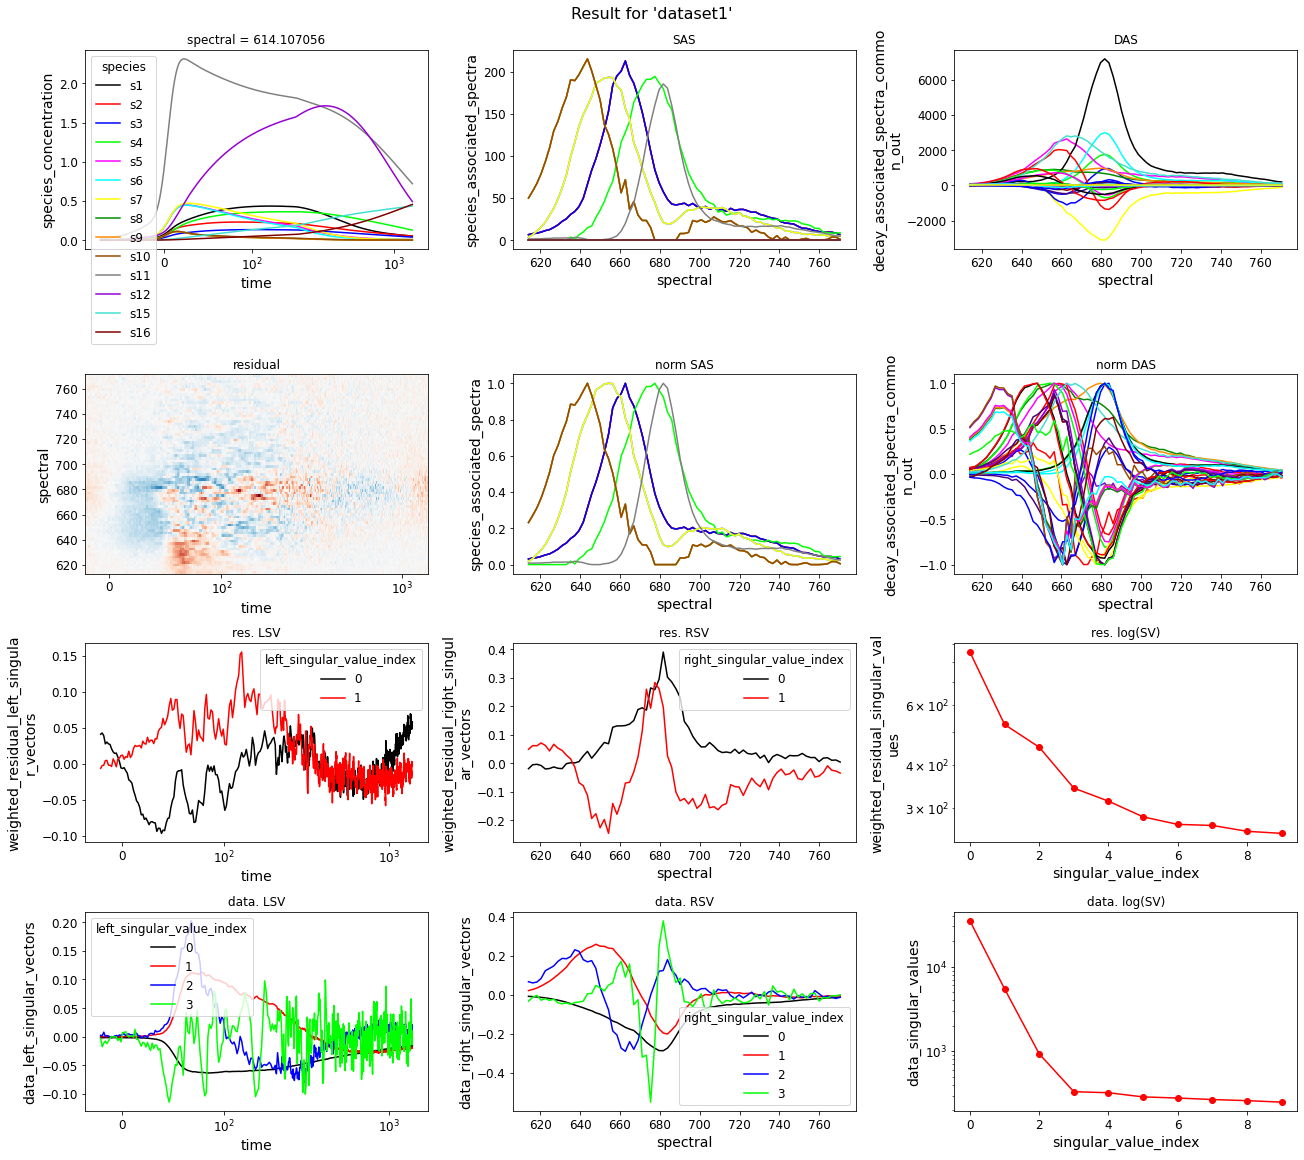

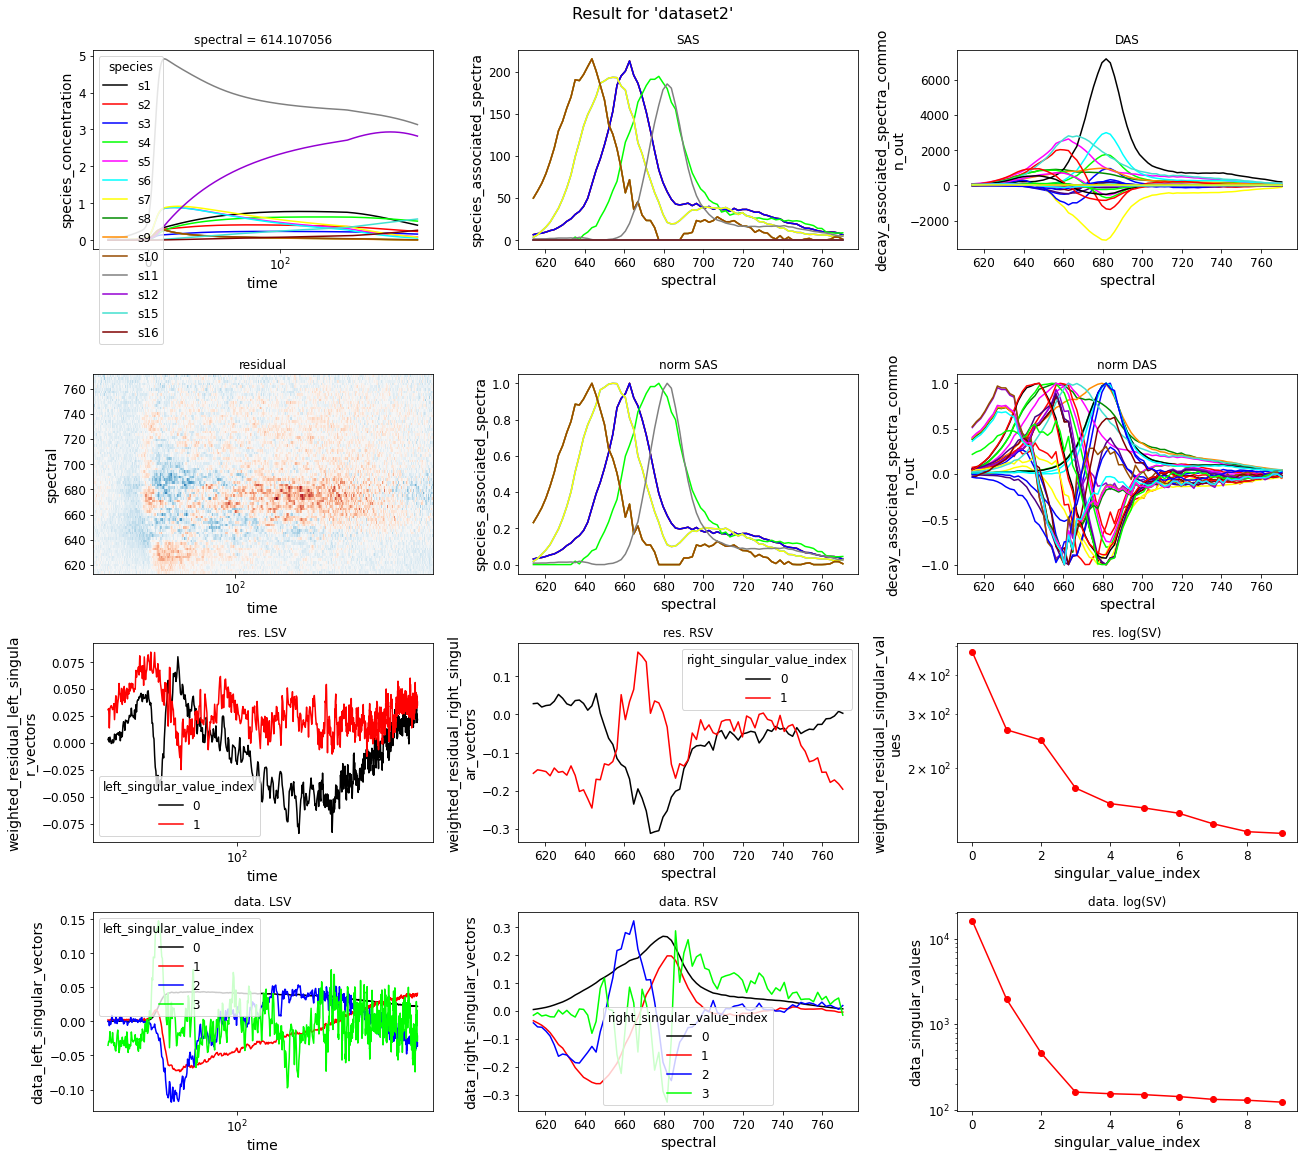

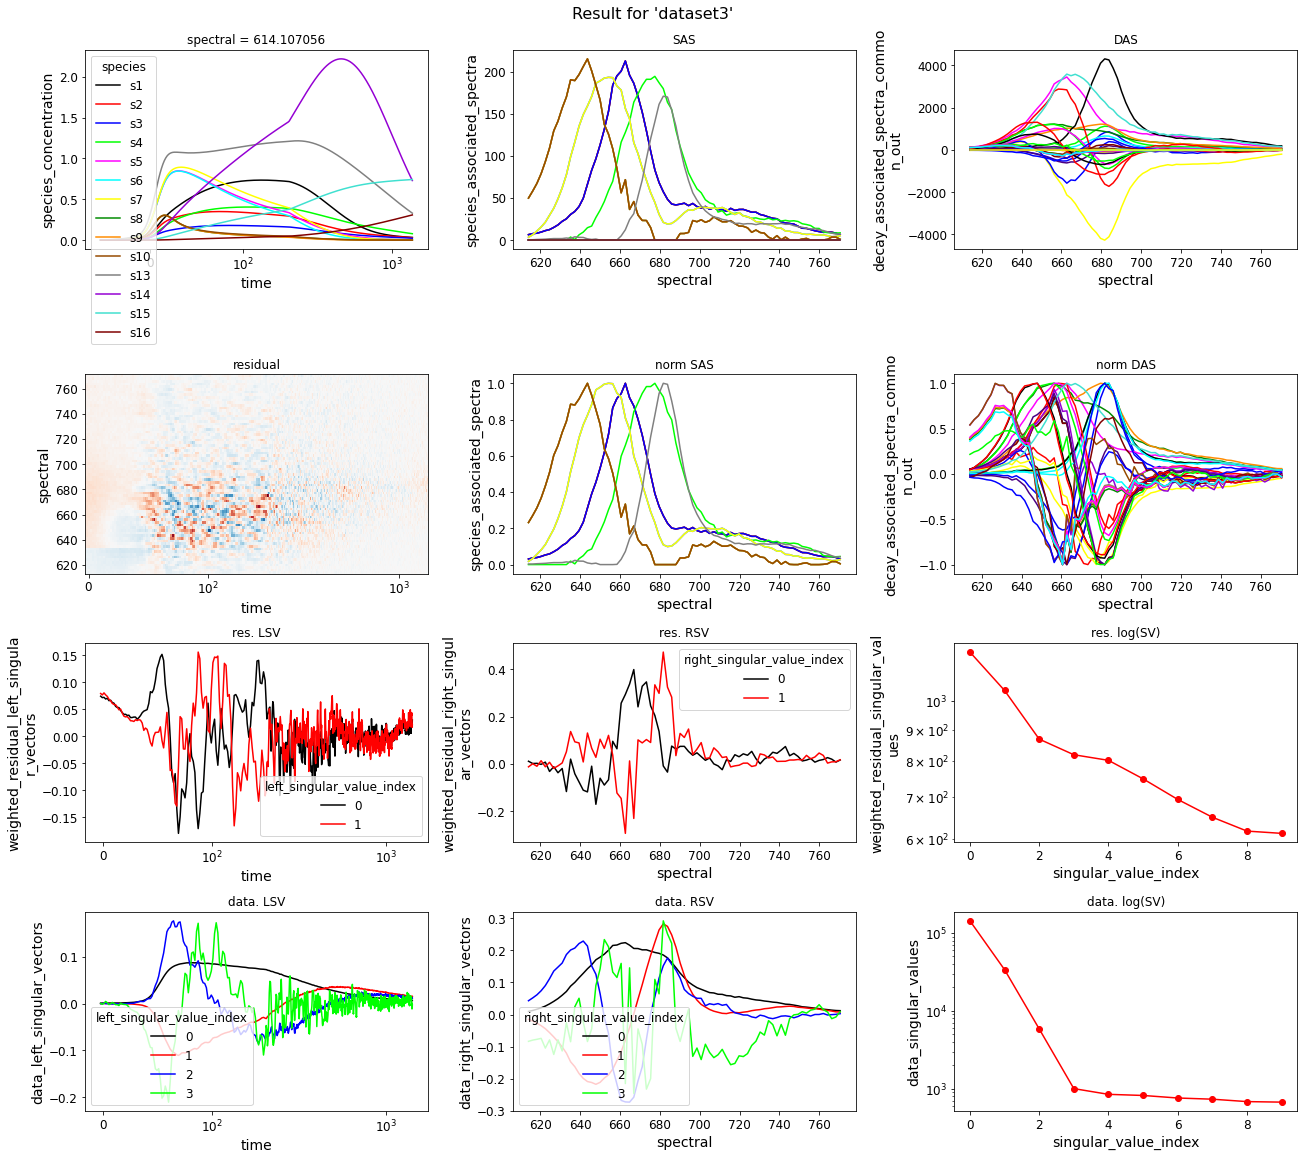

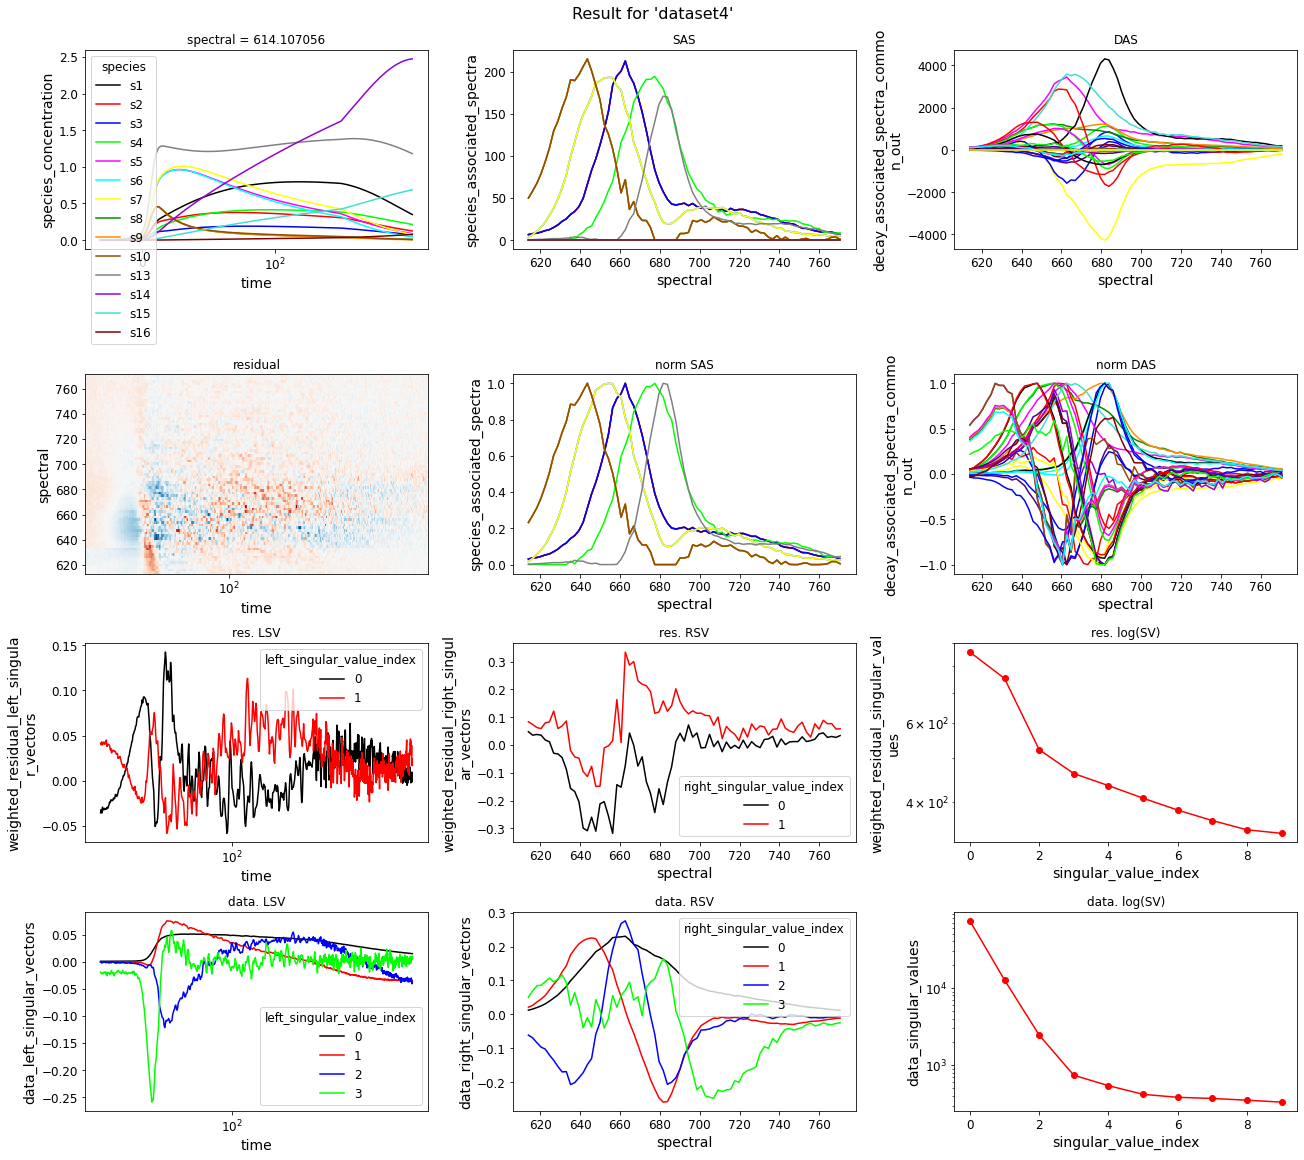

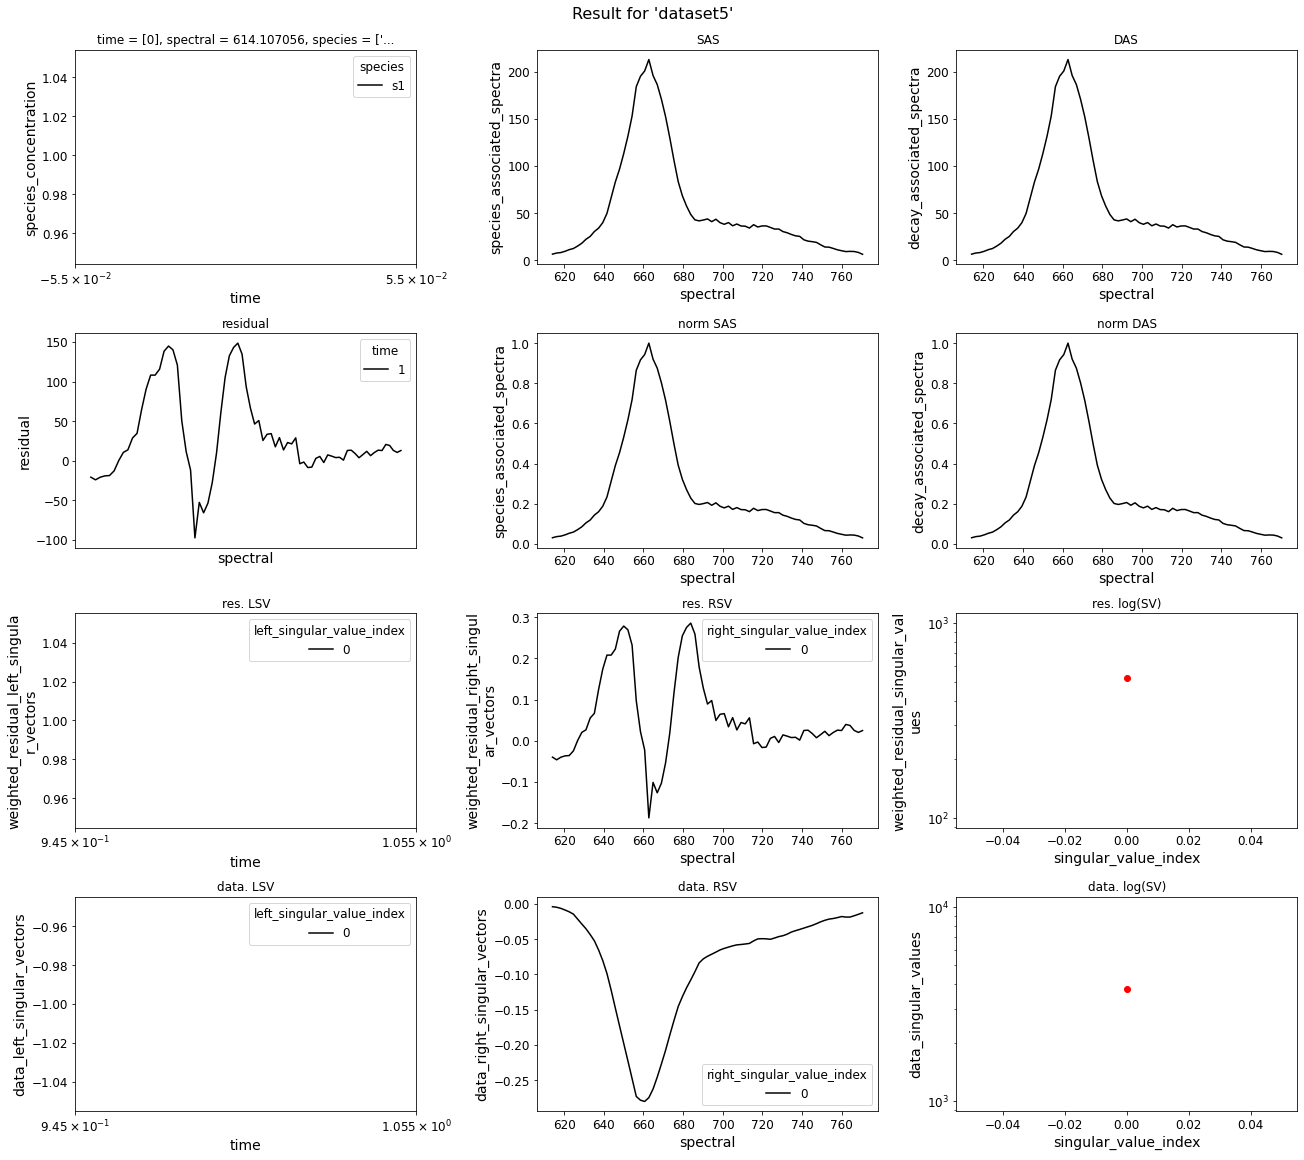

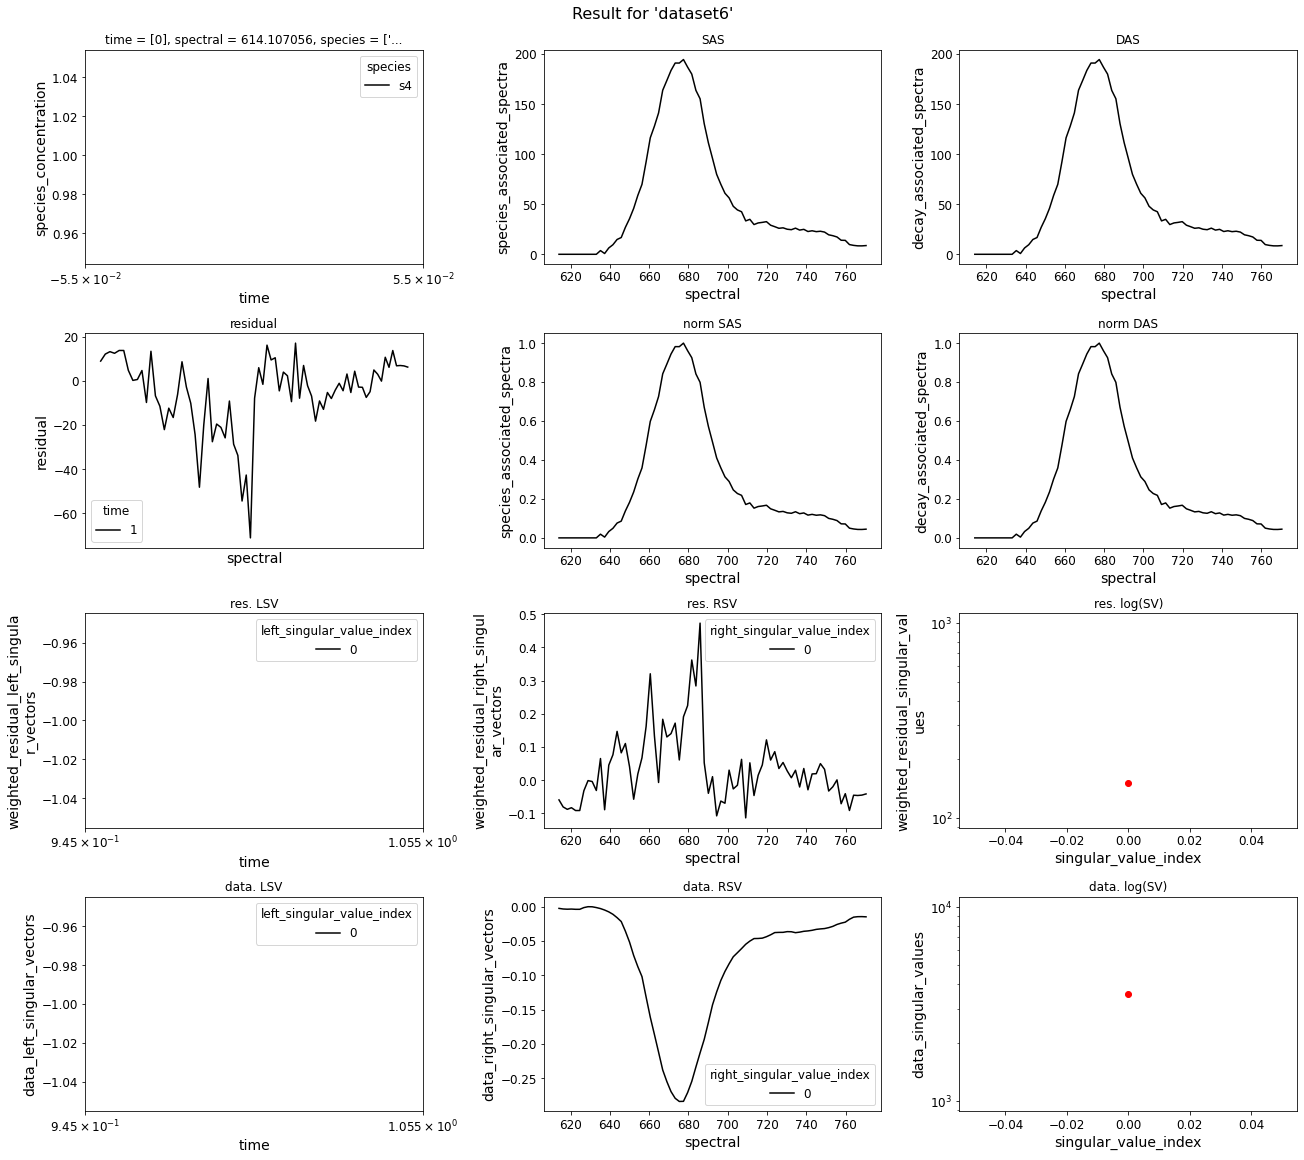

In [15]:
for dataset_name in six_datasets.keys():
    fig = plot_overview(guidance_result.data[dataset_name], linthresh=150)
    fig.suptitle(f"Result for {dataset_name!r}", fontsize=16)

In [16]:
print_md(sequential_result.optimized_parameters)

  * __inputs__:

    | _Label_   |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    | zero      |         0 |          0 |    -inf |     inf | False    | False            | None     |
    | one       |         1 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf__:

    | _Label_           |      _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-------------------|--------------|-------------|---------|---------|----------|------------------|----------|
    | center1           |    51.2006   | 0           |    -inf |     inf | False    | False            | None     |
    | center2           |    50.7999   | 0           |    -inf |     inf | False    | False            | None     |
    | center3           |    50.8097   | 0           |    -inf |     inf | False    | False            | None     |
    | center4           |    50.6241   | 0           |    -inf |     inf | False    | False            | None     |
    | width1            |     8.1106   | 0           |    -inf |     inf | False    | False            | None     |
    | width2            |    37.0027   | 0           |    -inf |     inf | False    | False            | None     |
    | width3            |     2.9626   | 0           |    -inf |     inf | False    | False            | None     |
    | width4            |    18.3664   | 0           |    -inf |     inf | False    | False            | None     |
    | width5            |     8.2726   | 0           |    -inf |     inf | False    | False            | None     |
    | width6            |    25.1026   | 0           |    -inf |     inf | False    | False            | None     |
    | width7            |     3.38693  | 0           |    -inf |     inf | False    | False            | None     |
    | width8            |    14.6401   | 0           |    -inf |     inf | False    | False            | None     |
    | scale1            |     1        | 0           |    -inf |     inf | False    | False            | None     |
    | scale2            |     0.190623 | 0.000391255 |    -inf |     inf | True     | False            | None     |
    | scale3            |     0.121257 | 0.000691829 |    -inf |     inf | True     | False            | None     |
    | scale4            |     0.246521 | 0.000105201 |    -inf |     inf | True     | False            | None     |
    | scale5            |     0.177543 | 0.000175361 |    -inf |     inf | True     | False            | None     |
    | common_dispcenter |   700        | 0           |    -inf |     inf | False    | False            | None     |
    | data1_disp1       |    -1.64111  | 0           |    -inf |     inf | False    | False            | None     |
    | data1_disp2       |     4.38865  | 0           |    -inf |     inf | False    | False            | None     |
    | data1_disp3       |    -2.19848  | 0           |    -inf |     inf | False    | False            | None     |
    | data1_disp4       |     6.1781   | 0           |    -inf |     inf | False    | False            | None     |
    | common_backsweep  | 13800        | 0           |    -inf |     inf | False    | False            | None     |

  * __rates__:

    | _Label_   |     _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-------------|-------------|---------|---------|----------|------------------|----------|
    | k1        | 0.0494367   | 0.000268494 |    -inf |     inf | True     | False            | None     |
    | k2        | 0.0145881   | 4.61099e-05 |    -inf |     inf | True     | False            | None     |
    | k3        | 0.00596503  | 5.43854e-06 |    -inf |     inf | True     | False            | None     |
    | k4        | 0.000670587 | 2.49008e-07 |    -inf |     inf | True     | False            | None     |

  * __rates2__:

    | _Label_   |    _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|------------|-------------|---------|---------|----------|------------------|----------|
    | k1        | 0.0370134  | 2.25217e-05 |    -inf |     inf | True     | False            | None     |
    | k2        | 0.0107148  | 5.53197e-06 |    -inf |     inf | True     | False            | None     |
    | k3        | 0.00617795 | 1.35019e-06 |    -inf |     inf | True     | False            | None     |
    | k4        | 0.00094287 | 1.52547e-07 |    -inf |     inf | True     | False            | None     |

  * __rel__:

    | _Label_   |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    | r1        |         1 |          0 |    -inf |     inf | False    | False            | None     |

  * __scale__:

    |   _Label_ |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|-------------|---------|---------|----------|------------------|----------|
    |         1 |  1        | 0           |    -inf |     inf | False    | False            | None     |
    |         2 |  0.206056 | 0.00105132  |    -inf |     inf | True     | False            | None     |
    |         3 |  4.5534   | 0           |    -inf |     inf | False    | False            | None     |
    |         4 |  0.98348  | 0.000845087 |    -inf |     inf | True     | False            | None     |

  * __scalem__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |         1 |          0 |    -inf |     inf | False    | False            | None     |



## Format notebook

In [17]:
# !nbqa black DPSI_case_study.ipynb --nbqa-mutate
# !nbqa isort DPSI_case_study.ipynb --nbqa-mutate